In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
samples = [
    "2Mu2E_100GeV_0p25GeV_0p02mm",
    "2Mu2E_100GeV_5GeV_0p4mm",
    "2Mu2E_1000GeV_0p25GeV_0p002mm",
    "2Mu2E_1000GeV_5GeV_0p04mm",
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
)

channels = ["baseNoLj" ,"2mu2e"]#, "pvAndCosmic_cuts"]
p = sidm_processor.SidmProcessor(
    channels,
    ["electron_extra", "base"  

    ],
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out = output["out"]

Output()

Output()

Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  b

# |∆ηseed|:

tracking based variable, |∆η| between GSF track and supercluster seed.

Text(0, 1, 'Number of Events')

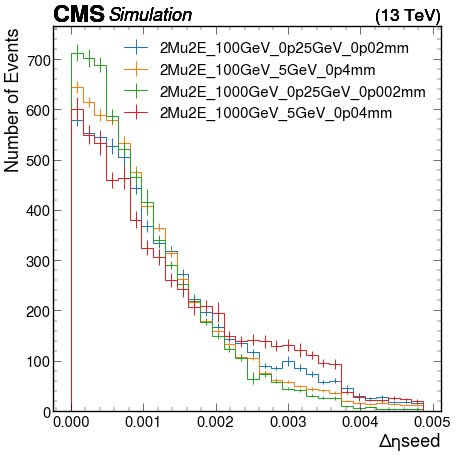

In [3]:
for sample in samples:
    hists = out[sample]["hists"]
    utilities.plot(hists["electron_GsfEleDEtaInSeedCut"][channels [0],:], label = sample, density = True)
plt.legend()
plt.xlabel("Δηseed")
plt.ylabel("Number of Events")

# |∆φin|:

tracking based variable, |∆φ| between GSF track and supercluster.

Text(0, 1, 'Number of Events')

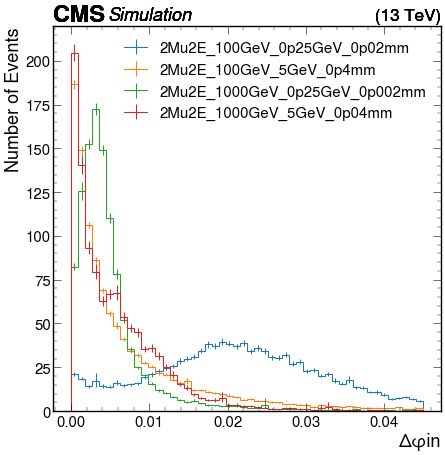

In [4]:
for sample in samples:
    hists = out[sample]["hists"]
    utilities.plot(hists["electron_GsfEleDPhiInCut"][channels [0],:], label = sample, density = True)
plt.legend()
plt.xlabel("Δφin")
plt.ylabel("Number of Events")

# |1/E - 1/𝒑|: 

absolute value of the difference between the ECAL supercluster energy inverse and the GSF track momentum inverse.


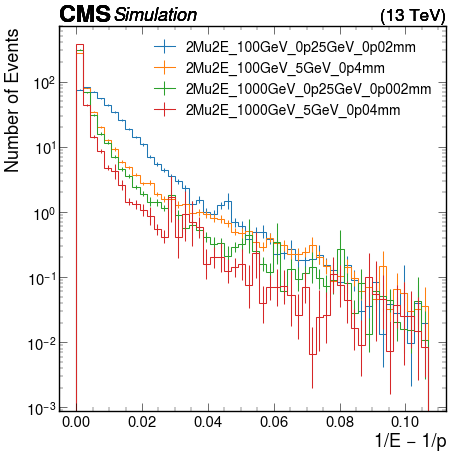

In [5]:
for sample in samples:
    hists = out[sample]["hists"]
    utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut"][channels [0],:], label = sample, density = True)
plt.legend(loc="upper right", prop={'size': 20})
plt.xlabel("1/E − 1/p")
plt.ylabel("Number of Events")
plt.yscale("log")

# Isolation:
relative isolation value with effective area corrections. It is calculated by considering all PFCandidates whose distance to the electron in question satisfies ∆R < 0.3 in the (η, φ) plane:

Iso = (Isoch + Isonh + Isopho)/pT

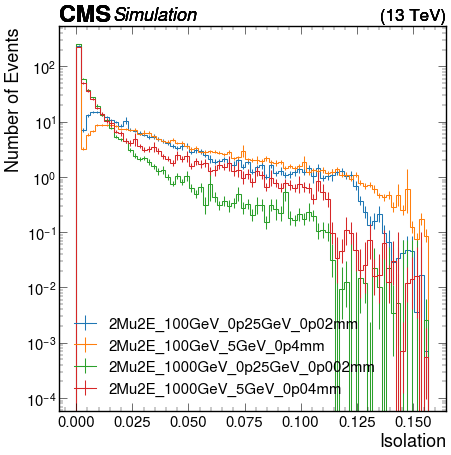

In [6]:
for sample in samples:
    hists = out[sample]["hists"]
    utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut"][channels [0],:], label = sample, density = True)
plt.legend()
plt.xlabel("Isolation")
plt.ylabel("Number of Events")
plt.yscale("log")

# σiηiη:

shower shape variable, defined as the energy-weighted standard deviation of
a single crystal eta within the 5 × 5 crystals centered at the crystal with maximum
energy.

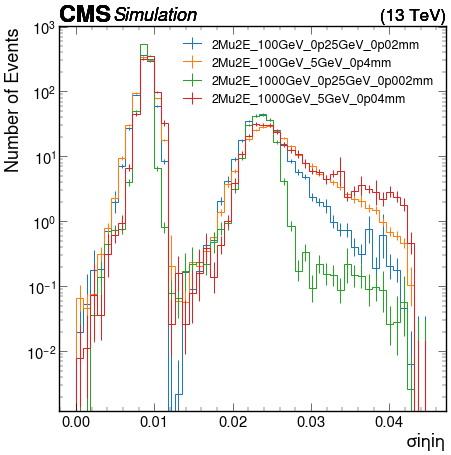

In [7]:
for sample in samples:
    hists = out[sample]["hists"]
    utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut"][channels [0],:], label = sample, density = True)
plt.legend(loc="upper right", prop={'size': 18})
plt.xlabel("σiηiη")
plt.ylabel("Number of Events")
plt.yscale("log")

In [8]:
#Q: how variables chanae with displacement, pick a boundatate mass and a photon mass where only displacemt is changing